# Code to reproduce results from bachelor thesis on clustering methods

### In this notebook we generate some synthetic data to demonstrate the differences between K-means clustering, the EM algorithm for clustering and Spectral Clustering

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

#### In this first section we visualize different similarity graphs (Using different similarity measures) that are typically used in the spectral clustering algorithm.

In [ ]:
def half_circle_data(n, r, R, centerX=0, centerY=0, updown = 0):
    np.random.seed(122)
    radius = R * np.sqrt(np.random.uniform(0,1, n))
    if updown == 0:
        angles = np.random.uniform(0, 0.5, n) * 2 * np.pi
    else:
        angles = np.random.uniform(0.5, 1, n) * 2 * np.pi
    x = centerX + radius *np.cos(angles) + r * np.cos(angles)
    y = centerY + radius *np.sin(angles) + r * np.sin(angles)
    return np.array([x,y]).transpose()

In [4]:
def MNN_graph(data, nn = 3):
    A = kneighbors_graph(data, nn, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False).toarray()
    return np.multiply(A, A.transpose())

def Gaussian_kernel(data, sigma):
    rows, cols = data.shape
    M = np.array([[0.0]*rows]*rows)
    for i in range(rows):
        for j in range(rows):
            val = -(np.linalg.norm(data[i,:] - data[j,:])**2) / (2*sigma**2)
            a = np.exp(val)
            M[i, j] = round(a, 2)
    return M

In [24]:
n = 100
half_upper = half_circle_data(n, 8, 5, centerX = 14, centerY = 20)
half_lower = half_circle_data(n, 8, 5, centerX = 24, centerY = 22.5, updown = 1)
data = np.concatenate((half_upper, half_lower), axis = 0)

classes = np.concatenate((np.array([0]*n), np.array([1]*n)), axis = 0)

epsilon_neighborhood = radius_neighbors_graph(data, 2, mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False).toarray()
KNN = kneighbors_graph(data, 5, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False).toarray()
MNN = MNN_graph(data, 5)
GK = Gaussian_kernel(data, sigma = 2) - np.identity(2*n)

G1 = nx.from_numpy_array(MNN)
G2 = nx.from_numpy_array(KNN)
G3 = nx.from_numpy_array(epsilon_neighborhood)
G4 = nx.from_numpy_array(GK)
weights = list(nx.get_edge_attributes(G4,'weight').values())


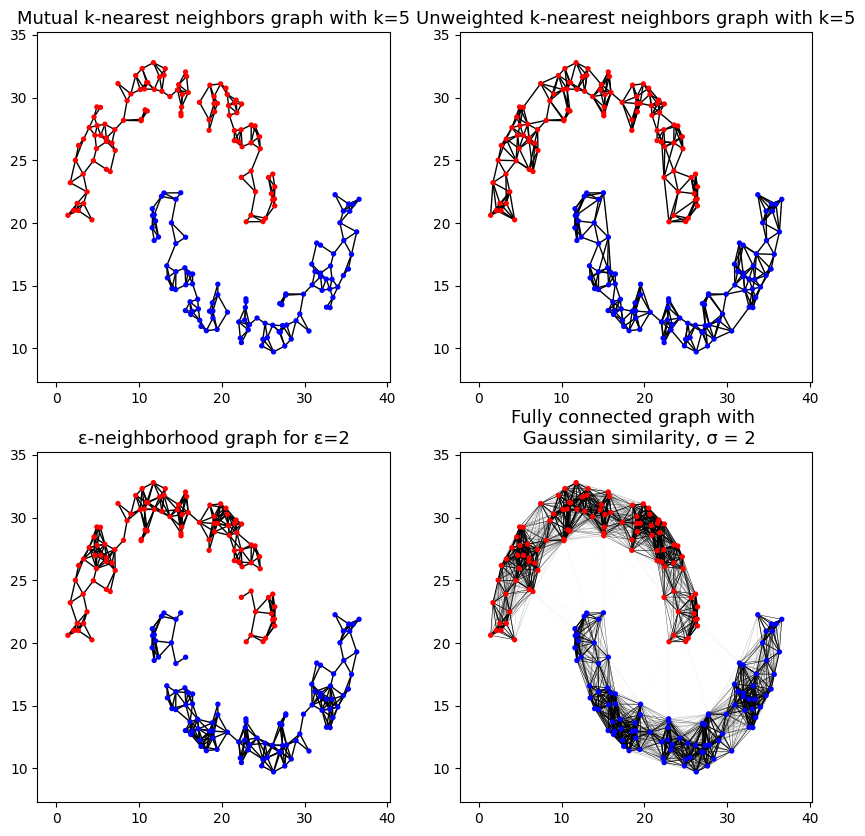

In [33]:
pos = { i : data[i,:] for i in range(len(data))}
colors = np.concatenate((["red" for i in range(n)], ["blue" for i in range(n)]), axis = 0)

fig, ax = plt.subplots(2,2, figsize = (10,10))
nx.draw(G1, pos, ax = ax[0,0], node_color = colors, node_size = 8)
ax[0,0].axis('on')
ax[0,0].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax[0,0].set_title("Mutual k-nearest neighbors graph with k=5", fontsize = 13)

nx.draw(G2, pos, ax = ax[0,1], node_color = colors, node_size = 8)
ax[0,1].axis('on')
ax[0,1].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax[0,1].set_title("Unweighted k-nearest neighbors graph with k=5", fontsize = 13)

nx.draw(G3, pos, ax = ax[1,0], node_color = colors, node_size = 8)
ax[1,0].axis('on')
ax[1,0].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax[1,0].set_title("\u03B5-neighborhood graph for \u03B5=2", fontsize = 13)

nx.draw(G4, pos, ax = ax[1,1], node_color = colors, node_size = 8, width = weights)
ax[1,1].axis('on')
ax[1,1].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax[1,1].set_title("Fully connected graph with \n Gaussian similarity, \u03C3 = 2", fontsize = 13)

plt.show()

#### Next we generate some synthetic data to compare the three clustering methods

In [59]:
def circle_data(n, R, centerX=0, centerY=0):
    radius = R * np.sqrt(np.random.uniform(0,1, n))
    angles = np.random.uniform(0,1, n) * 2 * np.pi
    x = centerX + radius *np.cos(angles)
    y = centerY + radius *np.sin(angles)
    return np.array([x,y]).transpose()

def data_normal(n, mean, cov):
    #np.random.seed(122)
    dat = np.random.multivariate_normal(mean, cov, size = n)
    return dat

def half_circle_data(n, r, R, centerX=0, centerY=0, updown = 0):
    radius = R * np.sqrt(np.random.uniform(0,1, n))
    if updown == 0:
        angles = np.random.uniform(0, 0.5, n) * 2 * np.pi
    else:
        angles = np.random.uniform(0.5, 1, n) * 2 * np.pi
    x = centerX + radius *np.cos(angles) + r * np.cos(angles)
    y = centerY + radius *np.sin(angles) + r * np.sin(angles)
    return np.array([x,y]).transpose()

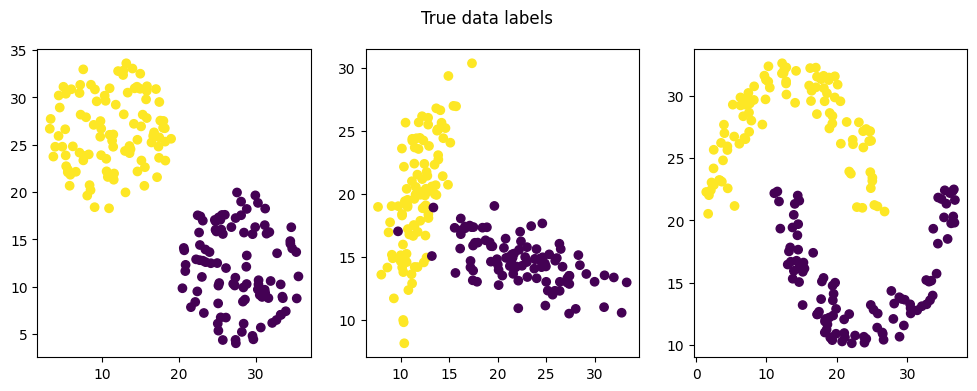

In [109]:
n = 100
normal1 = data_normal(n, np.array([12, 20]), np.array([[3,5],[5,20]]))
normal2 = data_normal(n, np.array([22, 15]), np.array([[20,-5],[-5,3]]))
normaldata = np.concatenate((normal1, normal2), axis = 0)

circle1 = circle_data(n, 8, centerX=11, centerY=26)
circle2 = circle_data(n, 8, centerX=28, centerY=12)
circledata = np.concatenate((circle1, circle2), axis = 0)

half_upper = half_circle_data(n, 8, 5, centerX = 14, centerY = 20)
half_lower = half_circle_data(n, 8, 5, centerX = 24, centerY = 22.5, updown = 1)
half_circles = np.concatenate((half_upper, half_lower), axis = 0)

classes = np.concatenate((np.array([1]*n), np.array([0]*n)), axis = 0)

fig, ax = plt.subplots(1,3, figsize = (12,4))
fig.suptitle('True data labels')
ax[0].scatter(circledata[:,0], circledata[:,1], c = classes)
ax[1].scatter(normaldata[:,0], normaldata[:,1], c = classes)
ax[2].scatter(half_circles[:,0], half_circles[:,1], c = classes)
plt.show()

#### A way to compare the methods is using the adjusted Rand index suggested in 'Objective Criteria for the Evaluation of Clustering Methods' in 1971 by William M. Rand (https://www.jstor.org/stable/2284239)

In [121]:
EM_circle = GaussianMixture(n_components=2, random_state=0).fit(circledata)
EM_normal = GaussianMixture(n_components=2, random_state=0).fit(normaldata)
EM_half = GaussianMixture(n_components=2, random_state=0).fit(half_circles)
print('EM algorithm circle data:', adjusted_rand_score(EM_circle.predict(circledata), classes))
print('EM algorithm Gausssian data:', adjusted_rand_score(EM_normal.predict(normaldata), classes))
print('EM algorithm half circles data:', adjusted_rand_score(EM_half.predict(half_circles), classes))

Kmeans_circle = KMeans(n_clusters=2, random_state=0, n_init = 100).fit(circledata)
Kmeans_normal = KMeans(n_clusters=2, random_state=0, n_init = 100).fit(normaldata)
Kmeans_half = KMeans(n_clusters=2, random_state=0, n_init = 100).fit(half_circles)
print('K-means algorithm circle data:', adjusted_rand_score(Kmeans_circle.labels_ , classes))
print('K-means algorithm Gausssian data:', adjusted_rand_score(Kmeans_normal.labels_ , classes))
print('K-means algorithm half circles data:', adjusted_rand_score(Kmeans_half.labels_ , classes))

SC_circle = SpectralClustering(n_clusters=2, affinity = 'nearest_neighbors', n_neighbors = 10, random_state=0).fit(circledata)
SC_normal = SpectralClustering(n_clusters=2, affinity = 'nearest_neighbors', n_neighbors = 10, random_state=0).fit(normaldata)
SC_half = SpectralClustering(n_clusters=2, affinity = 'nearest_neighbors', n_neighbors = 10, random_state=0).fit(half_circles)                                                                                                           

print('SC algorithm circle data:', adjusted_rand_score(SC_circle.labels_ , classes))
print('SC algorithm Gausssian data:', adjusted_rand_score(SC_normal.labels_ , classes))
print('SC algorithm half circles data:', adjusted_rand_score(SC_half.labels_ , classes))

EM algorithm circle data: 1.0
EM algorithm Gausssian data: 0.9406017851434009
EM algorithm half circles data: 0.7210997525768822
K-means algorithm circle data: 1.0
K-means algorithm Gausssian data: 0.7383107530769681
K-means algorithm half circles data: 0.3812959087199295


C:\Users\johau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\johau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SC algorithm circle data: 1.0
SC algorithm Gausssian data: 0.9406017851434009
SC algorithm half circles data: 1.0


#### Next we make a nice plot to visualize the differences

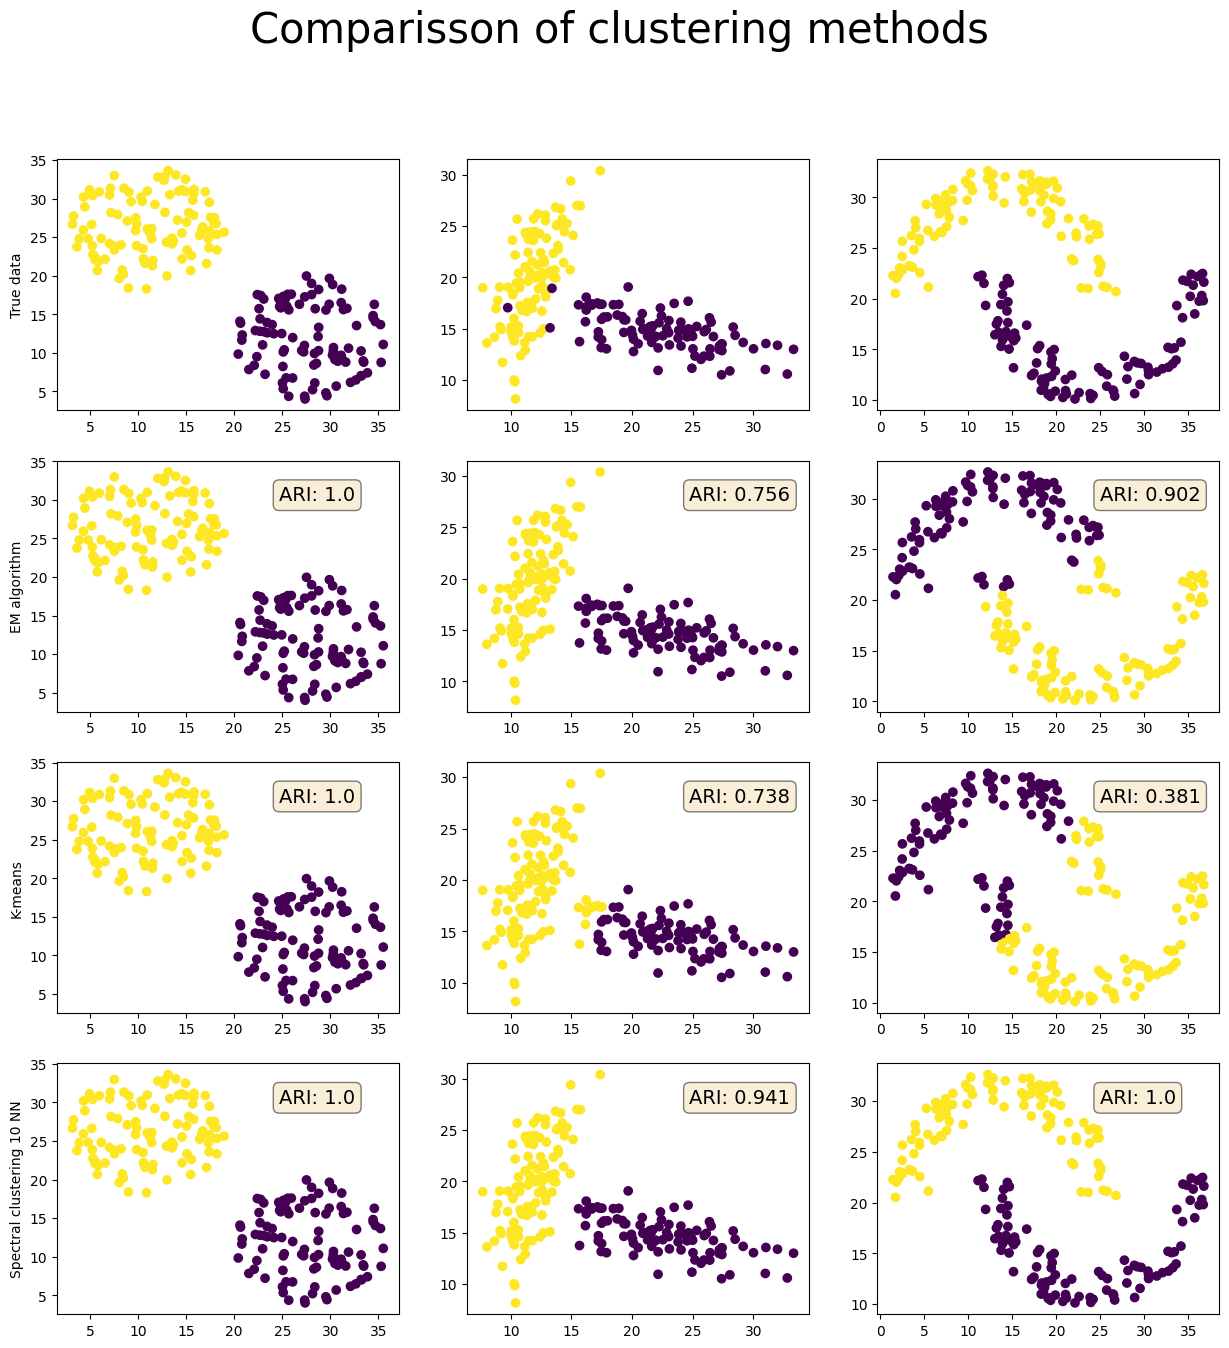

In [129]:

fig, ax = plt.subplots(4,3,figsize = (15,15))

fig.suptitle('Comparisson of clustering methods', fontsize = 30)

ax[0,0].scatter(circledata[:,0], circledata[:,1], c = classes)
ax[0,1].scatter(normaldata[:,0], normaldata[:,1], c = classes)
ax[0,2].scatter(half_circles[:,0], half_circles[:,1], c = classes)
ax[0,0].set_ylabel('True data')

ax[1,0].scatter(circledata[:,0], circledata[:,1], c = EM_circle.predict(circledata))
ax[1,0].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(EM_circle.predict(circledata) , classes),3)),
             transform=ax[1,0].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[1,1].scatter(normaldata[:,0], normaldata[:,1], c = EM_normal.predict(normaldata))
ax[1,1].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(EM_normal.predict(circledata) , classes),3)),
             transform=ax[1,1].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[1,2].scatter(half_circles[:,0], half_circles[:,1], c = EM_half.predict(half_circles))
ax[1,2].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(EM_half.predict(circledata) , classes),3)),
             transform=ax[1,2].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[1,0].set_ylabel('EM algorithm')

ax[2,0].scatter(circledata[:,0], circledata[:,1], c = Kmeans_circle.labels_)
ax[2,0].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(Kmeans_circle.labels_ , classes),3)),
             transform=ax[2,0].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[2,1].scatter(normaldata[:,0], normaldata[:,1], c = Kmeans_normal.labels_)
ax[2,1].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(Kmeans_normal.labels_ , classes),3)),
             transform=ax[2,1].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[2,2].scatter(half_circles[:,0], half_circles[:,1], c = Kmeans_half.labels_)
ax[2,2].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(Kmeans_half.labels_ , classes),3)),
             transform=ax[2,2].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[2,0].set_ylabel('K-means')

ax[3,0].scatter(circledata[:,0], circledata[:,1], c = SC_circle.labels_)
ax[3,0].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(SC_circle.labels_ , classes),3)),
             transform=ax[3,0].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[3,1].scatter(normaldata[:,0], normaldata[:,1], c = SC_normal.labels_)
ax[3,1].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(SC_normal.labels_ , classes),3)),
             transform=ax[3,1].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[3,2].scatter(half_circles[:,0], half_circles[:,1], c = SC_half.labels_)
ax[3,2].text(0.65, 0.9, s = "ARI: " + str(round(adjusted_rand_score(SC_half.labels_ , classes),3)),
             transform=ax[3,2].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[3,0].set_ylabel('Spectral clustering 10 NN')
plt.show()




